In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn.

In [2]:
genclass = pd.read_csv("../datasets/gender_classification_v7.csv")
genclass

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [3]:
genclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
genclass.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

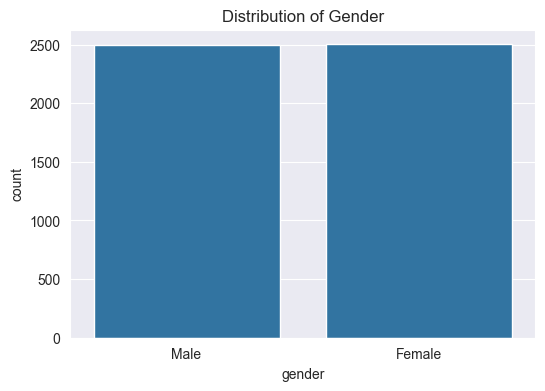

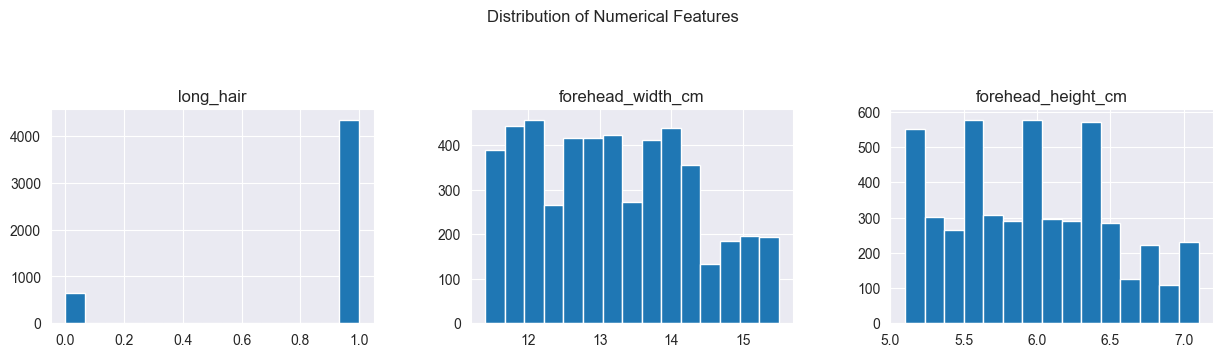

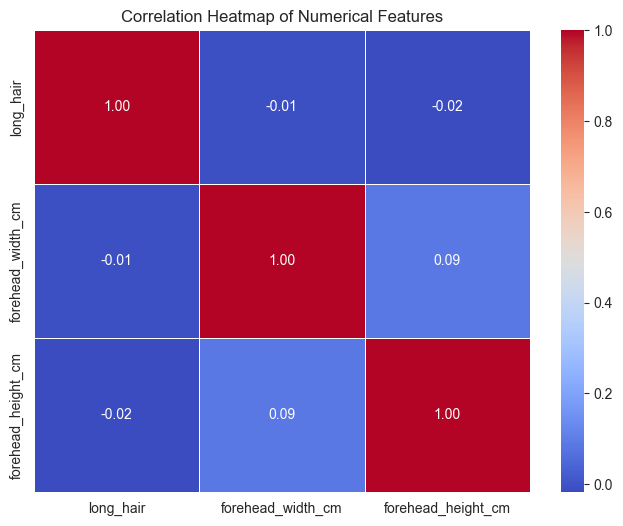

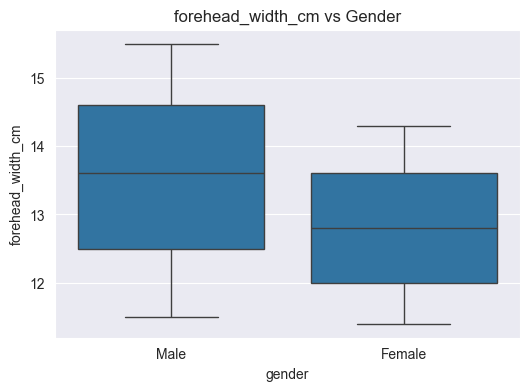

In [5]:
#EDA

# Step 1: Distribution of Target Variable (Gender)
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=genclass)  # 'gender' is the target variable
plt.title('Distribution of Gender')
plt.show()

# Step 2: Distribution of Features
numerical_columns = ['long_hair', 'forehead_width_cm', 'forehead_height_cm',]

# Create subplots for all numerical features
genclass[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Step 3: Correlation Heatmap
correlation_matrix = genclass[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
# Step 4: Visualizing relationships between features and the target

plt.figure(figsize=(6, 4))
sns.boxplot(x='gender', y='forehead_width_cm', data=genclass)
plt.title(f'forehead_width_cm vs Gender')
plt.show()




In [6]:
genclass.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Categorical to Numerical Data

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'City' column
genclass['gender'] = label_encoder.fit_transform(genclass['gender'])

# Show the encoded data
genclass.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [8]:
genclass.info()
# Splitting the data into features (X) and target (y)
X = genclass.drop(['gender'], axis=1)
y = genclass['gender']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


In [9]:
# Splitting the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 1. Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions with GaussianNB
y_pred_gnb = gnb.predict(X_test)

In [11]:
# Scaling features for MultinomialNB (converts data to a range between 0 and 1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
# 2. Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train_scaled, y_train)

# Make predictions with MultinomialNB
y_pred_mnb = mnb.predict(X_test_scaled)

In [13]:
# 3. Bernoulli Naive Bayes (binarize features)
binarizer = Binarizer()
X_train_bin = binarizer.fit_transform(X_train)  # Fit only on training data
X_test_bin = binarizer.transform(X_test)

In [14]:
# 3. Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train_bin, y_train)

# Make predictions with BernoulliNB
y_pred_bnb = bnb.predict(X_test_bin)

In [15]:
#Print Accuracies
print("GaussianNB Test Accuracy:", gnb.score(X_test, y_test))
print("MultinomialNB Test Accuracy:", mnb.score(X_test_scaled, y_test))
print("BernoulliNB Test Accuracy:", bnb.score(X_test_bin, y_test))

GaussianNB Test Accuracy: 0.964035964035964
MultinomialNB Test Accuracy: 0.9270729270729271
BernoulliNB Test Accuracy: 0.957042957042957


In [16]:
#Classification Report For all the Naive Bayes Algos

print("Gaussian Naive Bayes")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gnb))


print("\nMultinomial Naive Bayes")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mnb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mnb))


print("\nBernoulli Naive Bayes")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bnb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bnb))

Gaussian Naive Bayes
Confusion Matrix:
[[487  15]
 [ 21 478]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       502
           1       0.97      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001


Multinomial Naive Bayes
Confusion Matrix:
[[432  70]
 [  3 496]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       502
           1       0.88      0.99      0.93       499

    accuracy                           0.93      1001
   macro avg       0.93      0.93      0.93      1001
weighted avg       0.93      0.93      0.93      1001


Bernoulli Naive Bayes
Confusion Matrix:
[[474  28]
 [ 15 484]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97    